In [1]:
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split



/Users/halmooky/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# pull in the data

url = "final.csv"
df = pd.read_csv(url)
df.head()




,assists,champLevel,creeps_early,creeps_end,creeps_late,creeps_mid,csdiff_early,csdiff_end,csdiff_late,csdiff_mid,...,wardsPlaced,win,xp_early,xp_end,xp_late,xp_mid,xpdiff_early,xpdiff_end,xpdiff_late,xpdiff_mid
0,12,14,0.6,NaN,1.6,1.0,-1.25,NaN,-1.1,-1.05,...,18,1,285.8,NaN,560.1,263.0,-17.85,NaN,44.7,-116.45
1,3,15,0.2,NaN,1.3,0.2,NaN,NaN,NaN,NaN,...,6,1,265.2,NaN,635.2,478.0,NaN,NaN,NaN,NaN
2,10,15,2.7,NaN,6.0,6.5,NaN,NaN,NaN,NaN,...,9,1,294.5,NaN,515.7,442.7,NaN,NaN,NaN,NaN
3,4,17,7.3,NaN,7.2,8.0,2.20,NaN,5.2,4.70,...,6,1,523.0,NaN,594.8,630.0,71.00,NaN,373.6,190.10
4,4,10,1.3,NaN,NaN,1.9,-0.35,NaN,NaN,-0.85,...,7,0,262.5,NaN,NaN,240.7,-78.30,NaN,NaN,-179.35


In [3]:
df.fillna(0, inplace=True)
df.head()

,assists,champLevel,creeps_early,creeps_end,creeps_late,creeps_mid,csdiff_early,csdiff_end,csdiff_late,csdiff_mid,...,wardsPlaced,win,xp_early,xp_end,xp_late,xp_mid,xpdiff_early,xpdiff_end,xpdiff_late,xpdiff_mid
0,12,14,0.6,0.0,1.6,1.0,-1.25,0.0,-1.1,-1.05,...,18,1,285.8,0.0,560.1,263.0,-17.85,0.0,44.7,-116.45
1,3,15,0.2,0.0,1.3,0.2,0.00,0.0,0.0,0.00,...,6,1,265.2,0.0,635.2,478.0,0.00,0.0,0.0,0.00
2,10,15,2.7,0.0,6.0,6.5,0.00,0.0,0.0,0.00,...,9,1,294.5,0.0,515.7,442.7,0.00,0.0,0.0,0.00
3,4,17,7.3,0.0,7.2,8.0,2.20,0.0,5.2,4.70,...,6,1,523.0,0.0,594.8,630.0,71.00,0.0,373.6,190.10
4,4,10,1.3,0.0,0.0,1.9,-0.35,0.0,0.0,-0.85,...,7,0,262.5,0.0,0.0,240.7,-78.30,0.0,0.0,-179.35


In [4]:
# defining the target

target = df["highest_tier"]
# target_names = 

In [5]:
# remove the outcomes and a couple of other unwanted variables



data = df.drop("highest_tier", axis=1)
features = df.columns
data.head()

df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]


In [6]:
X_train, y_train = df_train.drop('highest_tier',axis=1), df_train['highest_tier']
X_test, y_test = df_test.drop('highest_tier',axis=1), df_test['highest_tier']



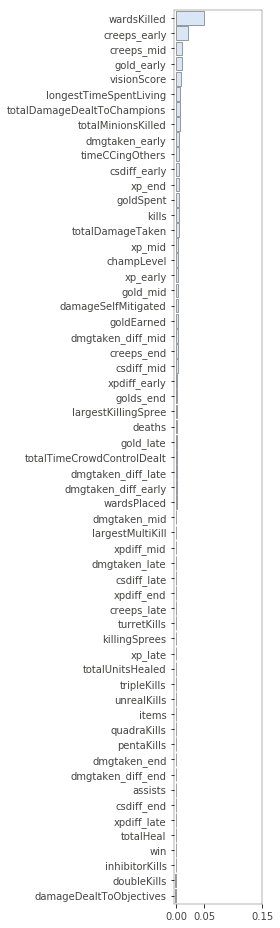

In [7]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()



In [ ]:
# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

# y_pred=clf.predict(X_test)

In [ ]:
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Loop through different k values to see which has the highest accuracy

# train_scores = []
# test_scores = []
# differences = []
# for k in range(1, 40, 2):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     train_score = knn.score(X_train, y_train)
#     test_score = knn.score(X_test, y_test)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     difference = knn.score(X_train, y_train) - knn.score(X_test, y_test)
#     differences.append(difference)
#     print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}/{difference:.3f}")
    
# # consistency     
# # for x in differences:
# #     consistent = (x + 1) - x 
    
    
# plt.plot(range(1, 40, 2), train_scores, marker='o')
# plt.plot(range(1, 40, 2), test_scores, marker="x")
# plt.xlabel("k neighbors")
# plt.ylabel("Testing accuracy Score")
# plt.show()


In [ ]:
# # Need to determine the best K for this dataset
# chosenk = 23

# knn = KNeighborsClassifier(n_neighbors=chosenk)
# knn.fit(X_train, y_train)
# print(f'k={chosenk} Test Acc: %.3f' % knn.score(X_test, y_test))

In [ ]:
# # save the model
# import pickle 
  
# # Save the trained model as a pickle string. 

# filename = 'NewpickledModel.pkl'
# outfile = open(filename,'wb')
# pickle.dump(knn,outfile)
# outfile.close()


In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

In [ ]:
forest.fit(data, target)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(data.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [ ]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data.shape[1]), indices)
plt.xlim([-1, data.shape[1]])
plt.show()